# Character Dataset Cleaning

In this notebook, we will focus on examining the "characters.metadata.tsv" dataset, with particular attention to the age and gender of actors. Rather than integrating all character attributes, our primary objective is to analyze how actor demographics might influence a movie’s appeal and performance. By studying and cleaning the age and gender features specifically, we aim to extract insights that can contribute to a deeper understanding of casting trends and audience preferences in preparation for Milestone 3.

### Loading the Dataset

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle

In [8]:
folder = '../data/CMU/'
pickle_folder = "../data/pickle/"

In [9]:
character_original_data = pd.read_csv(folder + 'character.metadata.tsv',sep='\t',names=['Wikipedia movie ID',
'Freebase_movie_ID',
'Movie_release_date',
'Character_name',
'Actor_date_of_birth',
'Actor_gender',
'Actor_height_(in_meters)',
'Actor_ethnicity_(Freebase_ID)',
'Actor_name',
'Actor_age_at_movie_release',
'Freebase_character/actor_map_ID',
'Freebase_character_ID',
'Freebase_actor_ID'])

In [10]:
characters = character_original_data.copy()

pickle.dump( character_original_data, open(pickle_folder + "characters.p", "wb" ) )

In [11]:
print(characters.shape[0])

450669


## Cleaning the release date of movies

- First, we wanted to drop all the movies where the released year is not shown. 

In [13]:
cd = characters.copy().dropna(subset=['Movie_release_date'])

- We also remarked that, same as in the 'movie' dataset, the movie "Hunting Season" has for released year : 1010-12-02. Which seems to be quite impossible, otherwise the creator of this movie is a real genius. Hence, by searching online we remarked the real date is 2010-12-02. So, we replaced the false released date by the true one : 

In [318]:
cd.loc[cd['Movie_release_date'] == '1010-12-02']

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
67624,29666067,/m/0fphzrf,1010-12-02,Kamuran,1983,M,NaN,NaN,Bartu Küçükçaglayan,NaN,/m/0n4fxh5,/m/0n4fxh8,/m/0df0qkt
67625,29666067,/m/0fphzrf,1010-12-02,Ferman,1941-12-26,M,NaN,NaN,Şener Şen,NaN,/m/0gb33kh,/m/0n4fgzm,/m/02z247j
67626,29666067,/m/0fphzrf,1010-12-02,Idris,1973-04-23,M,NaN,NaN,Cem Yılmaz,NaN,/m/0gb33kn,/m/0n4flr2,/m/0fz9xn
67627,29666067,/m/0fphzrf,1010-12-02,Hasan,1978-12-13,M,NaN,NaN,Okan Yalabık,NaN,/m/0ggd8h0,/m/0n4fsc3,/m/0cmb83k
67628,29666067,/m/0fphzrf,1010-12-02,Battal,1945-07-16,M,NaN,NaN,Çetin Tekindor,NaN,/m/0h9dtmf,/m/0n4frvc,/m/0ch5v5f
67629,29666067,/m/0fphzrf,1010-12-02,Asiye,1985-07-06,F,NaN,NaN,Melisa Sözen,NaN,/m/0k3m4yc,/m/0n4fs00,/m/0ch3v_t
67630,29666067,/m/0fphzrf,1010-12-02,Asit Omer,NaN,M,NaN,NaN,Riza Kocaoglu,NaN,/m/0n4fssj,/m/0n4fssm,/m/0n4fssv
67631,29666067,/m/0fphzrf,1010-12-02,Hatun,NaN,F,NaN,NaN,Nergis Çorakçi,NaN,/m/0n4ftj1,/m/0n4ftj4,/m/0n4ftjc
67632,29666067,/m/0fphzrf,1010-12-02,Müslüm,1963,M,NaN,NaN,Mustafa Avkiran,NaN,/m/0n4fv9p,/m/0n4fv9s,/m/0gc9xb7
67633,29666067,/m/0fphzrf,1010-12-02,Murat Önes,NaN,M,NaN,NaN,Mahir Ipek,NaN,/m/0n4fvtw,/m/0n4fvtz,/m/0n4fvv5


In [12]:
cd.loc[cd['Movie_release_date'] == '1010-12-02', 'Movie_release_date'] = '2010-12-02'

NameError: name 'cd' is not defined

- Now we created two differents dataset : <br>
  1. First one : 'cd_releasedYear' is a dataset where only the released Years are shown
  2. Second one : 'cd_releasedSeason' is a dataset where only movies whith exact released date are kept, and we can then show during which season (Winter, Fall, Spring, Summer) the movie was released 

1. We create the dataset 'cd_releasedYear' and then we save it to use this clean version on the results Jupyter Notebook
   

__NOTE__ : DOIT ON SUPPRIMER 'MOVIE_RELEASE_DATE' pour ce dataset on nous voulons seulement l'annee

In [320]:
cd_releasedYear = cd.copy()
cd_releasedYear['Year'] = cd_releasedYear['Movie_release_date'].str[:4]
cd_releasedYear['Year'] = cd_releasedYear['Year'].astype(int)
cd_releasedYear = cd_releasedYear.query(" 2016 > Year > 1910")
pickle.dump( cd_releasedYear, open(pickle_folder + "characters_date.p", "wb" ) )
cd_releasedYear.Year.describe()

count    440288.000000
mean       1984.590802
std          25.164372
min        1911.000000
25%        1969.000000
50%        1994.000000
75%        2005.000000
max        2015.000000
Name: Year, dtype: float64

In [321]:
cd_releasedYear

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957


2. Now, we create the dataset 'cd_releasedSeason' and then we save it to use this clean version on the results Jupyter Notebook.

__NOTE__ : j'ai fait une copie de released_year comme ca j'ai deja les year dans l'intervalle voulus, et comme season est une sous partie de year cela change rien

In [322]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)
from src.utils.utils import categorize_release_season

cd_releasedSeason = cd_releasedYear.copy()
cd_releasedSeason['Movie_release_date'] = pd.to_datetime(cd_releasedSeason['Movie_release_date'], errors='coerce')
cd_releasedSeason.dropna(subset = 'Movie_release_date', inplace = True)

- Check if monthes have the correct format (superior to 0 and inferior to 13) 

In [323]:
cd_releasedSeason['mois'] = cd_releasedSeason['Movie_release_date'].astype(str).str.split('-').str[1]
cd_releasedSeason['mois'] = cd_releasedSeason['mois'].astype(int)
cd_releasedSeason['mois'].describe()

count    273632.000000
mean          6.743042
std           3.453447
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: mois, dtype: float64

- Check if days have the correct format (superior to 0 and inferior to 32) 

In [324]:
cd_releasedSeason['jour'] = cd_releasedSeason['Movie_release_date'].astype(str).str.split('-').str[2]
cd_releasedSeason['jour'] = cd_releasedSeason['jour'].astype(int)
cd_releasedSeason['jour'].describe()

count    273632.000000
mean         15.685552
std           8.590671
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: jour, dtype: float64

In [325]:
cd_releasedSeason = cd_releasedSeason.drop(columns = 'mois')
cd_releasedSeason = cd_releasedSeason.drop(columns = 'jour')

- Now that we checked that format is good, we can create our dataset for released seasons : 

In [326]:
cd_releasedSeason['release_season'] = cd_releasedSeason['Movie_release_date'].apply(categorize_release_season)
cd_releasedSeason.release_season.value_counts()

release_season
Autumn    78633
Spring    68795
Winter    66013
Summer    60191
Name: count, dtype: int64

In [327]:
cd_releasedSeason

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,release_season
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,Summer
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,Summer
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,Summer
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,Summer
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992,Spring
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992,Spring
450663,913762,/m/03pcrp,1992-05-21,Exegran,NaN,M,NaN,NaN,Hal Cleaveland,NaN,/m/0kr407c,/m/0kr406_,/m/0kr407h,1992,Spring
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992,Spring


## Cleaning Gender of Actors

__A MODIFIER__ We decided to use some machine learning model to predict ... Hence, to do this, we need to convert the "Actor_variale" feature into a numerical variable. Hence, as seen in Exercise 6, we use the method get_dummies from pandas :

__PLUSIEURS QUESTIONS ICI__ : 
  1. Es ce qu'on drop le gender une fois qu'on a fait le get_dummies
  2. es ce qu'on drop les noms 
  3. es ce qu'on drop ethnicity (ciao)
  4. Actor height ? (ciao)

In [328]:
cd_actors = cd.copy()
cd_actors.dropna(inplace = True)
dummies = pd.get_dummies(cd_actors['Actor_gender'], prefix = 'gender')
cd_actors = cd_actors.merge(dummies, left_index=True, right_index=True)
cd_actors

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,gender_F,gender_M
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,True,False
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,False,True
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,True,False
56,2314463,/m/0734w5,2006,Taper Guy,1971-05-26,M,1.870,/m/033tf_,Matt Stone,34.0,/m/0cgn0lx,/m/0h0z488,/m/01_x6d,False,True
76,612710,/m/02wjqm,1999-10-01,Sandii,1975-09-20,F,1.680,/m/0222qb,Asia Argento,24.0,/m/02vcxk_,/m/0h2l6rx,/m/028pzq,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450565,22330502,/m/05sync6,1931-01-31,Yvonne Valbret,1905-09-18,F,1.702,/m/06mvq,Greta Garbo,25.0,/m/05tg4vb,/m/0h2ppfw,/m/0h14h,True,False
450585,24997872,/m/09g6klx,2010-05-07,Raja,1951-09-07,M,1.780,/m/04mvp8,Mammootty,58.0,/m/0gvytkx,/m/0h27wx_,/m/02hkv5,False,True
450586,24997872,/m/09g6klx,2010-05-07,Surya,1982-10-16,M,1.810,/m/0dryh9k,Prithviraj Sukumaran,27.0,/m/0gw0rm2,/m/0gz549m,/m/0cqcgj,False,True
450587,24997872,/m/09g6klx,2010-05-07,Aswathy,1982-09-11,F,1.680,/m/0dryh9k,Shriya Saran,27.0,/m/0gw423l,/m/0gyf84q,/m/09r_wb,True,False


- Here, we verify that all the values for the XOR are True (which means either gender_F is true or gender_M is true)

In [329]:
cd_actors['XOR'] = cd_actors['gender_F'] ^ cd_actors['gender_M']
cd_actors['XOR'].describe()

count     45264
unique        1
top        True
freq      45264
Name: XOR, dtype: object

## Verify the correctness of the age of actors

In this part the goal is to find all the errors evolving the age of actors, so first we drop all the lines where date of birth of actors is not detailed

In [330]:
cd_actorYear = cd_releasedYear.copy()
print(cd_actorYear.Actor_date_of_birth.isna().sum())
cd_actorYear.dropna(subset = 'Actor_date_of_birth', inplace = True)
cd_actorYear

105172


,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992


#### First idea : notice the year of birth of actors 

In [331]:
cd_actorYear['Year_of_birth'] = cd_actorYear['Actor_date_of_birth'].str[:4]
cd_actorYear['Year_of_birth'] = cd_actorYear['Year_of_birth'].astype(int)
cd_actorYear_sorted = cd_actorYear.sort_values(by='Year_of_birth')
cd_actorYear_sorted

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
45080,2244529,/m/06yt3z,2003,NaN,0019-03-22,F,NaN,NaN,Julie Stevens,-16.0,/m/0bff0wc,NaN,/m/06p14x,2003,19
80339,997174,/m/03xvc7,2001-11-02,NaN,0019-11-28,NaN,NaN,NaN,Leland L. Jones,-18.0,/m/0647261,NaN,/m/0273sb0,2001,19
246642,5313889,/m/0df13_,2007,NaN,0019-11-26,M,1.80,NaN,Dwayne L. Barnes,-12.0,/m/0gckdwz,NaN,/m/0gc91mg,2007,19
163428,5051761,/m/0d0l79,2006,NaN,0019-02-22,F,NaN,NaN,Dagney Kerr,-13.0,/m/0gc0gl6,NaN,/m/0fjlyh,2006,19
325421,7065434,/m/0h2m37,2001,NaN,0019-11-28,NaN,NaN,NaN,Leland L. Jones,-18.0,/m/0gdk7gn,NaN,/m/0273sb0,2001,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395292,2177168,/m/06sn0r,2000-09-22,NaN,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-10.0,/m/0cf_jdz,NaN,/m/0flhn7,2000,2011
345994,34654608,/m/0j26ybm,2012-02-04,NaN,2050,M,NaN,NaN,Naozumi Takahashi,-37.0,/m/0n9z5lz,NaN,/m/044pxh,2012,2050
300065,22643470,/m/05zqsh4,1926-10-29,NaN,2896-04-26,M,NaN,NaN,Matthieu van Eysden,-969.0,/m/0n1fz80,NaN,/m/0jt60hb,1926,2896
446570,3642891,/m/09rsyj,1999-10-03,Tess,2936-12-24,F,NaN,NaN,J.J. McColl,-937.0,/m/0l2rdfz,/m/0l2rdg1,/m/0l2rdg8,1999,2936


In [332]:
cd_actorYear_sorted.tail(20)

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
153249,17156133,/m/0464hn_,2009,NaN,2007-04-25,F,NaN,NaN,Felicity-Amore Castle-Hughes,1.0,/m/0gkjwmw,NaN,/m/0gkjwm_,2009,2007
85104,34537226,/m/0h1zb6y,2012-01-25,Henry Cozy,2008-01-10,M,NaN,NaN,Finn Donoghue,4.0,/m/0hh6zhj,/m/0hh6zhm,/m/0hh6zhv,2012,2008
442507,27111227,/m/0bs5f0b,2010-10-02,Sophie,2008-05-31,F,NaN,NaN,Brooke Clagett,2.0,/m/0dbykr9,/m/0dbygdk,/m/0dbykrf,2010,2008
195142,32298508,/m/0gx_t8p,2011-09-09,Troy,2008-10-29,M,NaN,NaN,Owen Bento,2.0,/m/0ghv2ln,/m/0ghv2k9,/m/0ghv2k6,2011,2008
442506,27111227,/m/0bs5f0b,2010-10-02,Sophie,2008-05-31,F,NaN,NaN,Brynn Clagett,2.0,/m/0dbykqy,/m/0dbygdk,/m/0dbykr1,2010,2008
442505,27111227,/m/0bs5f0b,2010-10-02,Sophie,2008-05-31,F,NaN,NaN,Alexis Clagett,2.0,/m/0dbygdg,/m/0dbygdk,/m/0dbygds,2010,2008
346990,5273390,/m/0dbzqh,1993-11-19,NaN,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-17.0,/m/02vc5w8,NaN,/m/0flhn7,1993,2011
72697,1693867,/m/05nyqk,2000-10-06,Thorpey,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-10.0,/m/0cpb70c,/m/0cpb70g,/m/0flhn7,2000,2011
314756,29114879,/m/0dlmnlr,2010,NaN,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-1.0,/m/0gm1jq0,NaN,/m/0flhn7,2010,2011
299570,4198361,/m/0bphhp,2005-12-15,Bernie Callo,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-5.0,/m/0cg48_3,/m/0h5shrm,/m/0flhn7,2005,2011


- Hence, we remark that there is some actors for which the year of birth was wrongly given to us. We hence decided to remove first all actors where their year of birth is superior to 2011 and inferior to 1700 : 

In [333]:
cd_actorYear = cd_actorYear[cd_actorYear['Year_of_birth'] <= 2011]
cd_actorYear = cd_actorYear[cd_actorYear['Year_of_birth'] >= 1700]
cd_actorYear_sorted = cd_actorYear.sort_values(by='Year_of_birth')
cd_actorYear_sorted

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
260125,35340704,/m/0j9mmmh,1931-11-28,NaN,1796-09-20,M,NaN,NaN,Robert Strange,NaN,/m/0mzl3w3,NaN,/m/02kl51,1931,1796
305915,27883510,/m/0ch4_f5,1918,NaN,1804,F,NaN,/m/0x67,Mammy Lou,NaN,/m/0chbj1p,NaN,/m/0d06zw,1918,1804
327317,23718902,/m/06zrjvf,1985,NaN,1828-09-09,M,NaN,/m/0g6ff,Leo Tolstoy,NaN,/m/0n291dr,NaN,/m/01tz6vs,1985,1828
140124,7227076,/m/0kv13m,1913-01-25,Police Inspector,1835-03-22,M,NaN,NaN,Matt Snyder,NaN,/m/0j96s0t,/m/0j96s0x,/m/0j96s13,1913,1835
88371,4597981,/m/0cbvdh,1918-03-31,NaN,1837,M,NaN,NaN,William J. Gross,NaN,/m/0gc2klj,NaN,/m/0gc2kln,1918,1837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395292,2177168,/m/06sn0r,2000-09-22,NaN,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-10.0,/m/0cf_jdz,NaN,/m/0flhn7,2000,2011
351527,6031488,/m/0flhyr,2005-03-19,NaN,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-6.0,/m/040sy3t,NaN,/m/0flhn7,2005,2011
314756,29114879,/m/0dlmnlr,2010,NaN,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-1.0,/m/0gm1jq0,NaN,/m/0flhn7,2010,2011
299570,4198361,/m/0bphhp,2005-12-15,Bernie Callo,2011-09-02,M,1.75,/m/05sf2x,John Cassini,-5.0,/m/0cg48_3,/m/0h5shrm,/m/0flhn7,2005,2011


- We also decided to drop all the lines where the Actor age at_movie release is not given : 

In [334]:
cd_actorYear.Actor_age_at_movie_release.isna().sum()

42565

In [335]:
cd_actorYear.dropna(subset = 'Actor_age_at_movie_release', inplace = True)
cd_actorYear

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,1958
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,1974
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,1969
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,1967
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450660,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz,1992,1954
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992,1954
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992,1958
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992,1965


- Then, by watching the age of actors at movie release, we saw that some actors had negative years which is impossible. Hence, we also decided to remove them from the dataset

In [336]:
actorAge = cd_actorYear.sort_values(by = 'Actor_age_at_movie_release')
actorAge

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
297956,6149842,/m/0fss91,1912-05-14,Jack's pal,1988-05-23,M,NaN,NaN,William R. Dunn,-76.0,/m/0j6q20l,/m/0j6q247,/m/0j6q20p,1912,1988
30166,33625136,/m/0hgnkt6,1916,NaN,1981-10-04,F,NaN,NaN,Muriel Martin-Harvey,-65.0,/m/0hnry5v,NaN,/m/0hgpbp5,1916,1981
92519,17455134,/m/04g207n,1914-04-17,Sua moglie,1978-04-14,F,NaN,NaN,Tilde Teldi,-63.0,/m/0n4jd_w,/m/0n4jd_z,/m/0n4jf05,1914,1978
405166,28927168,/m/0dgq9l5,1929,NaN,1986-09-16,M,1.8,NaN,Ian M. Harding,-57.0,/m/0g9df2d,NaN,/m/0ct3_s,1929,1986
101748,14319873,/m/03d0dxy,1918-10-13,NaN,1972-05-10,M,NaN,NaN,Cary Guffey,-53.0,/m/04hts6w,NaN,/m/0crpzw,1918,1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265602,22302454,/m/05szt9b,2010-01-14,NaN,1912-11-09,M,NaN,NaN,Sathyaneshan Nadar,97.0,/m/0kbnpnq,NaN,/m/027n_w_,2010,1912
40945,16366579,/m/03whwvj,2003-12-12,NaN,1904-11-16,F,NaN,NaN,Renée Saint-Cyr,99.0,/m/0h0__xn,NaN,/m/0czcmjn,2003,1904
14061,7494411,/m/0263fpm,2005-09-10,NaN,1906-07-08,M,NaN,NaN,Philip Johnson,99.0,/m/0h1k3wt,NaN,/m/0d__g,2005,1906
230088,30241563,/m/0g59rl8,2004,NaN,1900-12-20,M,NaN,NaN,Lokesh,103.0,/m/0jx7c12,NaN,/m/0bbz0rv,2004,1900


In [337]:
cd_actorYear = cd_actorYear[cd_actorYear['Actor_age_at_movie_release'] >= 0]
actorAge = cd_actorYear.sort_values(by = 'Actor_age_at_movie_release')
actorAge

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
358771,25514131,/m/09rvbv0,1950-10-04,Pierre,1951-05-24,M,NaN,NaN,Jean-Pierre Bacri,0.0,/m/0gwf63v,/m/0gwf62h,/m/0gwb0x,1950,1951
211729,8283097,/m/026yyys,1950,NaN,1949,F,NaN,NaN,Judith Alice Clark,0.0,/m/02vcvj2,NaN,/m/06lszy,1950,1949
345679,7816833,/m/026f1dz,1939,NaN,1939-07-28,M,NaN,/m/06mvq,Gösta Ekman,0.0,/m/0bycsyc,NaN,/m/03zb2m,1939,1939
184098,16358705,/m/03whqw5,1963-04-04,Rose Alvarez,1963-03-18,F,1.68,/m/0x67,Vanessa L. Williams,0.0,/m/04hzhxg,/m/04hzhxk,/m/0pyg6,1963,1963
147070,1834161,/m/05_n08,1958,NaN,1957-05-08,M,NaN,NaN,Michel François,0.0,/m/0j_y4h,NaN,/m/05bt5h,1958,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378934,21874955,/m/05pbxsl,2000,NaN,1902-08-22,F,NaN,NaN,Leni Riefenstahl,97.0,/m/05tfb7w,NaN,/m/04gjj,2000,1902
40945,16366579,/m/03whwvj,2003-12-12,NaN,1904-11-16,F,NaN,NaN,Renée Saint-Cyr,99.0,/m/0h0__xn,NaN,/m/0czcmjn,2003,1904
14061,7494411,/m/0263fpm,2005-09-10,NaN,1906-07-08,M,NaN,NaN,Philip Johnson,99.0,/m/0h1k3wt,NaN,/m/0d__g,2005,1906
407572,34362803,/m/0h_chfy,2012-03-06,NaN,1908-05-30,M,NaN,/m/041rx,Mel Blanc,103.0,/m/0mzkr96,NaN,/m/0c5vh,2012,1908


- Then, to clean a bit more the dataset, we tried to see is there was incoherence in the dataset to remove them such that : If there is negative value differences between the year of release of the movie and the year where the actor is born. If there is a negative difference it means the actor is born after the movie was released, which is impossible.


In [338]:
df_filtered = cd_actorYear[cd_actorYear['Year'] - cd_actorYear['Year_of_birth'] < 0]
df_filtered

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
358771,25514131,/m/09rvbv0,1950-10-04,Pierre,1951-05-24,M,NaN,NaN,Jean-Pierre Bacri,0.0,/m/0gwf63v,/m/0gwf62h,/m/0gwb0x,1950,1951
411655,3336243,/m/096gn1,1987-10-09,NaN,1988,F,NaN,NaN,Liza Morrow,0.0,/m/0gdkk0h,NaN,/m/0cb7sx,1987,1988


Hence, we remove those two characters : 

In [339]:
cd_actorYear = cd_actorYear[cd_actorYear['Year'] - cd_actorYear['Year_of_birth'] >= 0]

- Finally, we wanted to see if there was old people as actors for certain movies :

In [341]:
df_filtered = cd_actorYear[cd_actorYear['Year'] - cd_actorYear['Year_of_birth'] >= 100]
df_filtered

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
230088,30241563,/m/0g59rl8,2004,NaN,1900-12-20,M,NaN,NaN,Lokesh,103.0,/m/0jx7c12,NaN,/m/0bbz0rv,2004,1900
407572,34362803,/m/0h_chfy,2012-03-06,NaN,1908-05-30,M,NaN,/m/041rx,Mel Blanc,103.0,/m/0mzkr96,NaN,/m/0c5vh,2012,1908


When we searched online for the names of the two actors, we discovered that Mel Blanc passed away on July 10, 1989, making it impossible for him to have acted in a film released in 2012. Additionally, Lokesh, reportedly born in 1900 and credited with the movie ID 30241563 (Barood, released in 2004), is actually Lokesh Ghosh, a younger actor still active today, as seen in "Panch Kayedi" (2022). Therefore, it is impossible for him to have been born in 1900. As a result, we removed these two entries from our dataset.


In [343]:
cd_actorYear = cd_actorYear[cd_actorYear['Year'] - cd_actorYear['Year_of_birth'] < 100]
cd_actorYear

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Year,Year_of_birth
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,1958
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,1974
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,1969
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,1967
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450660,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz,1992,1954
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992,1954
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992,1958
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992,1965


<Axes: xlabel='Year', ylabel='Year_of_birth'>

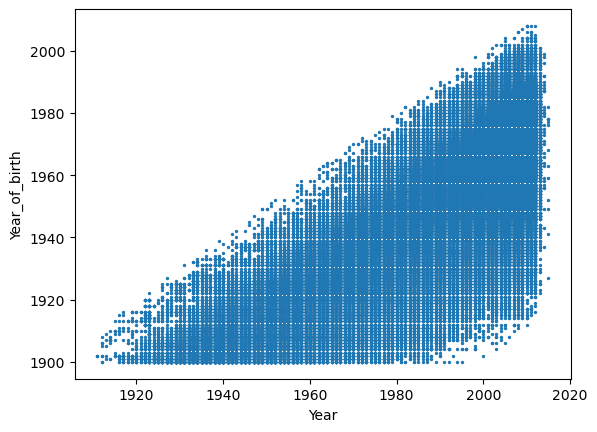

In [344]:
cd_actorYear.plot.scatter(x = 'Year', y = 'Year_of_birth', s = 2)